In [76]:
import cv2
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

In [77]:
# CLASS IMPORTS
from YOLO import Yolo

CLASSES = [ "Bird", "Cat", "Dog", "Flower", "Face" ]  # class names

In [78]:
def transform(URL, img_size = 320, int8 = False):
    int_type = np.int8 if int8 else np.float32
    img = io.imread(URL)
    im = cv2.resize(img, (img_size, img_size), 3).astype(int_type)
    im = np.expand_dims(im, axis=0)/255.0
    return img, im

In [79]:
url = "https://images.unsplash.com/photo-1650542915678-b2eb9be25ed3?crop=entropy&cs=tinysrgb&fit=max&fm=jpg&ixid=MnwyMTYyOTB8MHwxfGFsbHwxMzl8fHx8fHwyfHwxNjUxMDYzNTc1&ixlib=rb-1.2.1&q=80&w=400"
is_qantized = False

In [80]:
def urlRoute():

    URL = url
    int8 = is_qantized
    img, im = transform(URL)

    MODEL_PATH = 'tflite_models/custom_int800.tflite' if int8 else 'tflite_models/custom01.tflite'
    YOLO = Yolo(model_path = MODEL_PATH, CLASSES = CLASSES, int8 = int8)

    H = img.shape[0]
    W = img.shape[1]
    YOLO.pred(im)

    scores = YOLO.YOLOdetect()
    bbox = YOLO.return_bbox(scores)
    data = YOLO.return_results(scores, bbox, H, W)

    del YOLO, bbox, scores

    return data, img

In [81]:
data, img = urlRoute()
data

{'class_names': ['Dog'],
 'class_scores': [82],
 'coordinates': [[39, 321, 287, 503]],
 'final': array(['39', '321', '287', '503', 'Dog', '82'], dtype='<U11')}

In [82]:
if len(data["final"].shape) == 1:
    data["final"] = np.expand_dims(data["final"], axis=0)
data["final"]

array([['39', '321', '287', '503', 'Dog', '82']], dtype='<U11')

In [83]:
def show_results(img, data):
    for result in data["final"]:
        print(result)
        xmin, ymin, xmax, ymax = result[..., :4]
        class_name = result[4]
        score = result[5]
        text = f"{class_name} : {score}%"
        cv2.rectangle(img, (int(xmin),int(ymin)), (int(xmax),int(ymax)), (225, 100, 0), 3)
        cv2.putText(img, text, (int(xmin), int(ymin)-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
    plt.imshow(img)
    plt.show()

['39' '321' '287' '503' 'Dog' '82']


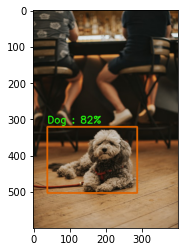

In [84]:
show_results(img, data)